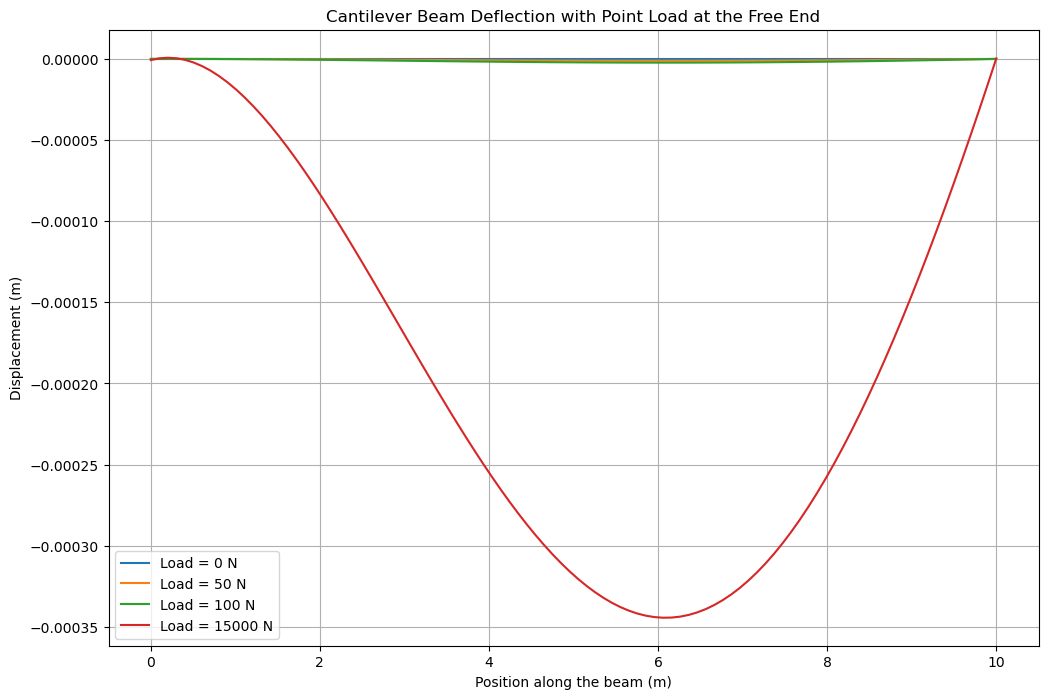

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve

def construct_A_matrix(n, delta_x):
    diagonal = np.zeros(n)
    off_diagonal1 = np.zeros(n-1)
    off_diagonal2 = np.zeros(n-2)
    

    diagonal[2:-2] = 6
    diagonal[1] = diagonal[-2] = 7  
    diagonal[0] = diagonal[-1] = 1

    off_diagonal1[2:-2] = -4
    off_diagonal1[1] = off_diagonal1[-2] = -4 
    off_diagonal2[:] = 1


    A = diags(
        [off_diagonal2, off_diagonal1, diagonal, off_diagonal1, off_diagonal2],
        offsets=[-2, -1, 0, 1, 2],
        shape=(n, n),
        format='csc'
    )
    
    A *= EI / (delta_x ** 4)
    
    return A

def g_function(x, t, g_value, L, delta_x):
    return g_value if x >= L - delta_x else 0

    
def trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, t_k, g_value, L):
    n = len(x_values)
    g_k = np.array([g_function(x, t_k, g_value, L, delta_x) for x in x_values])
    g_k1 = np.array([g_function(x, t_k + delta_t, g_value, L, delta_x) for x in x_values])
    
    first_term = I - (1/2) * delta_t * (EI/mu) * A
    second_term = u_k + (delta_t/2) * ((EI/mu) * (A @ u_k) + g_k + g_k1)
    
    u_k1 = spsolve(first_term, second_term)
    
    return u_k1

n = 100 
L = 10.0  # Length of the beam in meters
EI = 1.0e2  # Flexural rigidity in N*m^2
mu = 0.1  # Mass per unit length in kg/m
delta_x = L / (n - 1)  
delta_t = 0.001
x_values = np.linspace(0, L, n)  
I = identity(n, format='csc') 

load_values = [0, 50, 100, 15000]  # in N

plt.figure(figsize=(12, 8))

A = construct_A_matrix(n, delta_x)

for load in load_values:
    u_k = np.zeros(n)
    u_k1 = trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, 0, load, L)
    

    plt.plot(x_values, u_k1, label=f'Load = {load} N')

    # if load != 0:
    #     plt.arrow(L, 0, 0, u_k1[-1], head_width=0.2, head_length=0.1, fc='red', ec='red')

plt.title('Cantilever Beam Deflection with Point Load at the Free End')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()

[[ 6.         -4.          1.         ...  0.          0.
   0.        ]
 [-6.5         9.33333333 -6.5        ...  0.          0.
   0.        ]
 [ 2.         -6.5         9.33333333 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.33333333 -6.5
   2.        ]
 [ 0.          0.          0.         ... -6.5         9.33333333
  -6.5       ]
 [ 0.          0.          0.         ...  1.         -4.
   6.        ]]
  (3, 0)	-0.16666666666666666
  (2, 0)	2.0
  (1, 0)	-6.5
  (0, 0)	6.0
  (4, 1)	-0.16666666666666666
  (3, 1)	2.0
  (2, 1)	-6.5
  (1, 1)	9.333333333333334
  (0, 1)	-4.0
  (5, 2)	-0.16666666666666666
  (4, 2)	2.0
  (3, 2)	-6.5
  (2, 2)	9.333333333333334
  (1, 2)	-6.5
  (0, 2)	1.0
  (6, 3)	-0.16666666666666666
  (5, 3)	2.0
  (4, 3)	-6.5
  (3, 3)	9.333333333333334
  (2, 3)	-6.5
  (1, 3)	2.0
  (0, 3)	0.0
  (7, 4)	-0.16666666666666666
  (6, 4)	2.0
  (5, 4)	-6.5
  :	:
  (94, 95)	-6.5
  (93, 95)	2.0
  (92, 95)	-0.16666666666666666
  (99, 96)	0.0
  (

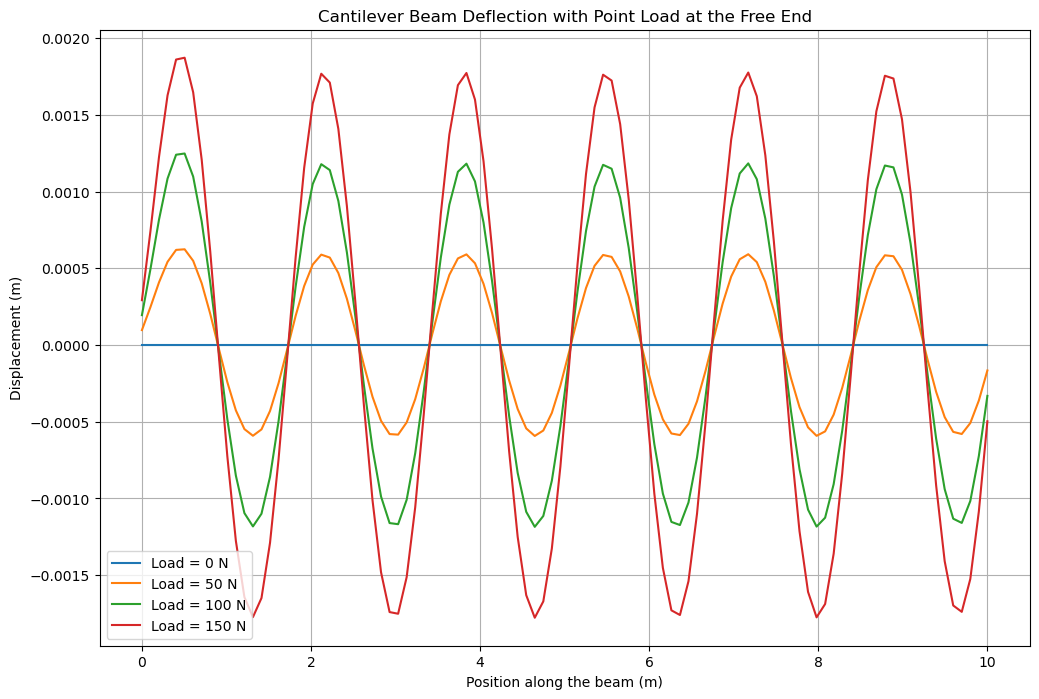

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, identity
from scipy.sparse.linalg import spsolve
from scipy import sparse as sp

def construct_A_matrix(n, delta_x):
    diagonal = np.zeros(n)
    off_diagonal1 = np.zeros(n-1)
    off_diagonal2 = np.zeros(n-2)
    off_diagonal3 = np.zeros(n-3)
    

    diagonal[1:-1] = 28/3
    diagonal[0] = diagonal[-1] = 6

    off_diagonal1[0:n] = -13/2
     
    off_diagonal2[0:n] = 2
    
    off_diagonal3[0:n] = -1/6


    A = diags(
        [off_diagonal3, off_diagonal2, off_diagonal1, diagonal, off_diagonal1, off_diagonal2, off_diagonal3],
        offsets=[-3, -2, -1, 0, 1, 2, 3],
        shape=(n, n),
        format='csc'
    )
    A[0,0] = A[n-1, n-1] = 6
    A[0,1] = A[n-1, n-2] = -4
    A[0,2] = A[n-1, n-3] = 1
    A[0,3] = A[n-1, n-4] = 0
    
    print(A.toarray())
    print(A)
    
    A *= EI / (delta_x ** 4)
    
    return A


def g_function(x, t, g_value, L, delta_x):
    return g_value if x >= L - delta_x else 0

    
def trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, t_k, g_value, L):
    n = len(x_values)
    g_k = np.array([g_function(x, t_k, g_value, L, delta_x) for x in x_values])
    g_k1 = np.array([g_function(x, t_k + delta_t, g_value, L, delta_x) for x in x_values])
    
    first_term = I - (1/2) * delta_t * A
    second_term = u_k + (delta_t/2)  * ((A @ u_k) @ + g_k + g_k1)
    
    u_k1 = spsolve(first_term, second_term)
    
    return u_k1

n = 100 
L = 10.0  # Length of the beam in meters
EI = 1.0e2  # Flexural rigidity in N*m^2
mu = 0.1  # Mass per unit length in kg/m
delta_x = L / (n - 1)  
delta_t = 0.0001  
x_values = np.linspace(0, L, n)  
I = identity(n, format='csc') 

load_values = [0, 50, 100, 150]  # in N

plt.figure(figsize=(12, 8))

A = construct_A_matrix(n, delta_x)

for load in load_values:
    u_k = np.zeros(n)
    u_k1 = trapezoid_step(u_k, A, I, EI, mu, delta_t, delta_x, x_values, 0, load, L)
    

    plt.plot(x_values, u_k1, label=f'Load = {load} N')

    # if load != 0:
    #     plt.arrow(L, 0, 0, u_k1[-1], head_width=0.2, head_length=0.1, fc='red', ec='red')

plt.title('Cantilever Beam Deflection with Point Load at the Free End')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()